In [11]:
import matplotlib.pyplot as plt
from glob import glob
import cv2

In [17]:
def list_img(folder):
    imgs = [file_ for file_ in glob(f'C:/Users/jdeblander/LiveProjects/Image classification/Data/{folder}/*/*.jpg')]
    return imgs

print(f"Number of images for train is: ", len(list_img(folder = 'train')))

print(f"Number of images for test is: ", len(list_img(folder = 'test')))

print(f"Number of images for valication is: ", len(list_img(folder = 'validation')))


Number of images for train is:  2400
Number of images for test is:  800
Number of images for valication is:  800


In [22]:
def display_image(file):

    img = cv2.imread(file)
    img = cv2.resize(img, (100, 100))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img / 255
    return img

In [23]:
img = display_image(list_img('train')[10])

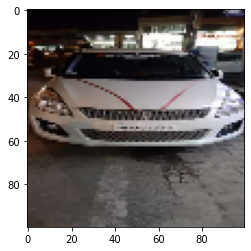

In [24]:
plt.imshow(img)

In [25]:
from random import randint

def show_images(images_list):
    '''Method for debugging and visualization of images'''
    n: int = len(images_list)
    f = plt.figure(figsize=(15, 15))
    columns = 4
    rows = 4
    for i in range(columns*rows):
        image_path = images_list[randint(0, n - 1)]
        fol_name = image_path.split("/")[-2]
        # Debug, plot figure
        ax = f.add_subplot(rows, columns, i + 1)
        ax.set_title(fol_name)
        img = display_image(image_path)
        plt.axis('off')
        plt.imshow(img)

    plt.show(block=True)

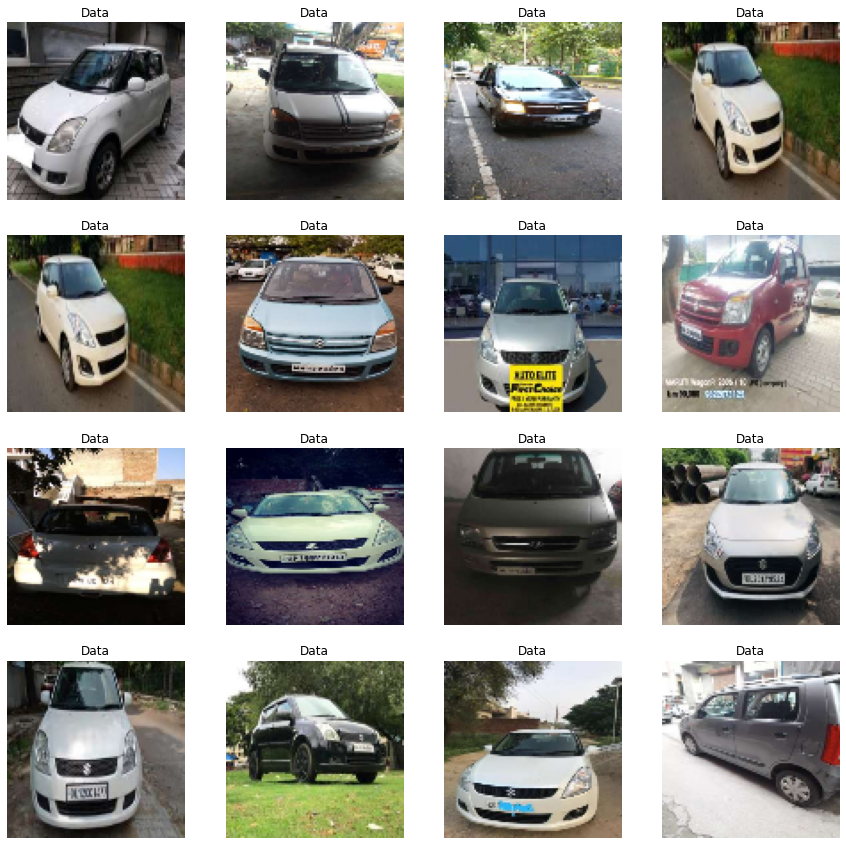

In [26]:
show_images(list_img('train'))

In [35]:
def image_per_class(folder):
    
    dict_class = {}
    for class_ in ['swift', 'wagonr']:
        imgs = [file_ for file_ in glob(rf"C:\Users\jdeblander\LiveProjects\Image classification\Data\{folder}\{class_}\*.jpg")]
        dict_class[class_] = len(imgs)

    plt.bar(dict_class.keys(), dict_class.values())

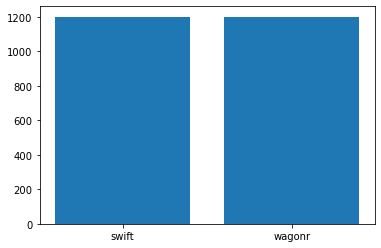

In [36]:
image_per_class('train')

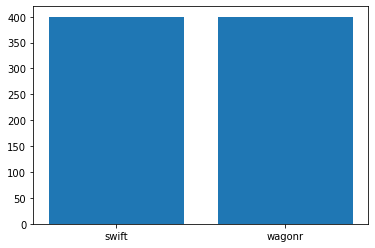

In [37]:
image_per_class('test')

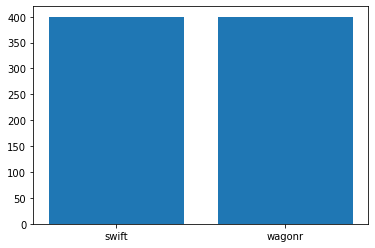

In [38]:
image_per_class('validation')

In [44]:
import numpy as np

def prepare_images(folder):

    paths = list_img(folder)
    imgs = [display_image(path) for path in paths]

    # Convert to numpy
    image_array = np.array(imgs)
    return image_array

In [55]:
train_array = prepare_images('train')

In [54]:
test_array = prepare_images('test')

In [53]:
valid_array = prepare_images('valid')

In [56]:
# Create pickle file
import pickle

folder = "train_test_val_array.pkl"

pickle.dump(
    [
        train_array, ['train' for _ in range(len(train_array))],
        test_array, ['test' for _ in range(len(test_array))],
        valid_array, ['valid' for _ in range(len(valid_array))]
    ], 
    open(folder, 'wb'))